# B-1 Well Plotting

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
def plot_well(df, well):
    df = df[df['Well'] == well]

    # electrofacies color map
    ef_colors = ['red', 'green', 'blue', 'yellow', 'cyan'] 
    cmap_ef = colors.ListedColormap(ef_colors) 

    # lithofacies color map
    litho_colors = ['mediumseagreen', 'orange', 'yellow', 'saddlebrown', 'grey', 'cyan']
    cmap_litho = colors.ListedColormap(litho_colors)  

    # deposition environment color map
    env_colors = ['saddlebrown', 'yellowgreen', 'turquoise', 'darkgreen', 'grey', 'blue'] 
    cmap_env = colors.ListedColormap(env_colors) 

    cluster1 = np.repeat(np.expand_dims(df.Ef_pred, 1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(df.Facies_pred, 1), 100, 1)
    cluster3 = np.repeat(np.expand_dims(df.Env_pred, 1), 100, 1)

    # Set the top and bottom of depth
    top = df['Depth'].max()
    bottom = df['Depth'].min()

    # plotting
    fig, ax = plt.subplots(1, 8, figsize=(25, 12))

    # tops
    # fm_tops = dict(df[['Formation', 'Depth']].dropna().values.tolist())

    # ax[0].set_xlabel('Tops ', fontsize = '12' )
    # ax[0].set_ylabel('Measured Depth (m) ', fontsize = '12' )
    # ax[0].set_xticklabels([])
    # ax[0].set_xticks([])
    # ax[0].set_facecolor('#ffffed')
    # ax[0].set_ylim(df.Depth.min(), df.Depth.max())
    # ax[0].xaxis.set_label_position("top")
    # ax[0].invert_yaxis()
    # for Top in fm_tops.values() :
    #     ax[0].axhline(y = float(Top), color = 'k', lw = 1, ls = '-',    
    #                         alpha = 0.9, xmin = 0.06, xmax = 0.95 )
    # for Top, MD in fm_tops.items():
    #     ax[0].text(x = 0.45,  y = float(MD), s = Top , fontsize = '9', 
    #             horizontalalignment = 'center', verticalalignment = 'bottom')

    # GR
    ax[0].plot(df.GR, df.Depth, c='g')
    ax[0].set_xlabel('Gamma Ray (API)')
    ax[0].set_ylabel('Measured Depth (m) ', fontsize = '12')
    ax[0].set_ylim(top, bottom)
    ax[0].set_xlim(df.GR.min(), df.GR.max(), 10)
    ax[0].grid()
    ax[0].xaxis.set_label_position('top')
    ax[0].xaxis.set_ticks_position('top')

    # RHOB
    ax[1].plot(df.RHOB, df.Depth, c='r')
    ax[1].set_xlabel('Density (g/cc)')
    ax[1].set_ylim(top, bottom)
    ax[1].set_xlim(df.RHOB.min(), df.RHOB.max())
    ax[1].grid()
    ax[1].xaxis.set_label_position('top')
    ax[1].xaxis.set_ticks_position('top')
    ax[1].set_yticklabels([])

    # NPHI
    ax[2].plot(df.NPHI, df.Depth, c='black')
    ax[2].set_xlabel('NPHI (.pu)')
    ax[2].set_ylim(top, bottom)
    ax[2].set_xlim(df.NPHI.min(), df.NPHI.max())
    ax[2].grid()
    ax[2].xaxis.set_label_position('top')
    ax[2].xaxis.set_ticks_position('top')
    ax[2].set_yticklabels([])

    # DTCO
    ax[3].plot(df.DTCO, df.Depth, c='blue')
    ax[3].set_xlabel('DTCO (us/f)')
    ax[3].set_ylim(top, bottom)
    ax[3].set_xlim(df.DTCO.min(), df.DTCO.max())
    ax[3].grid()
    ax[3].xaxis.set_label_position('top')
    ax[3].xaxis.set_ticks_position('top')
    ax[3].set_yticklabels([])

    # DTSM
    ax[4].plot(df.DTSM, df.Depth, c='red')
    ax[4].set_xlabel('DTSM (us/f)')
    ax[4].set_ylim(top, bottom)
    ax[4].set_xlim(df.DTSM.min(), df.DTSM.max())
    ax[4].grid()
    ax[4].xaxis.set_label_position('top')
    ax[4].xaxis.set_ticks_position('top')
    ax[4].set_yticklabels([])

    # electrofacies
    im = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap = cmap_ef, vmin=0, vmax=5)
    ax[5].set_xlabel('Electrofacies')
    ax[5].xaxis.set_label_position('top')
    ax[5].xaxis.set_ticks_position('top')
    ax[5].set_xticks([])
    ax[5].set_yticklabels([])

    # color bar
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar = plt.colorbar(im, cax = cax)
    cbar.set_label((40*' ').join(['Cy', 'Fu', 'Be', 'SI', 'Sy']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

    # lithofacies
    im = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                      cmap=cmap_litho, vmin=0, vmax=6)
    ax[6].set_xlabel('Lithofacies')
    ax[6].xaxis.set_label_position('top')
    ax[6].xaxis.set_ticks_position('top')
    ax[6].set_xticks([])
    ax[6].set_yticklabels([])

    # lithofacies color bar
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label((30 * ' ').join(['Si ', 'VSiS', 'SiSs',
                                    'SiCl', 'Cl', 'SiSsCt']))
    cbar.set_ticks(range(0, 1));
    cbar.set_ticklabels('')

    # deposition environment
    im = ax[7].imshow(cluster3, interpolation='none', aspect='auto',
                    cmap = cmap_env, vmin=0, vmax=6)
    ax[7].set_xlabel('Deposition Environment')
    ax[7].xaxis.set_label_position('top')
    ax[7].xaxis.set_ticks_position('top')
    ax[7].set_xticks([])
    ax[7].set_yticklabels([])

    # color bar
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar = plt.colorbar(im, cax = cax)
    cbar.set_label((30*' ').join(['MoS ', 'Sh', 'MI', 
                                  'ImS', 'Ind', 'Ma']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

    # title
    fig.suptitle('%s Well' % df['Well'].iloc[0], fontsize=14)

    plt.savefig('B-1 Well Prediction')

    plt.show()

In [ ]:
df = pd.read_csv('boreas.csv', index_col= 0)

df = df.replace([-999.25, df.GR.max()], np.nan)

df.head()

,Depth,Well,Formation,GR,RS,RD,NPHI,RHOB,DTCO,DTSM,Ef_pred,Facies_pred,Env_pred
0,4610.0,B-1,Echuca Shoals Fm,55.3259,1.4348,1.4170,12.04,2.6282,87.4786,NaN,2,4,4
1,4610.5,B-1,Echuca Shoals Fm,61.7744,1.1341,1.0694,18.93,2.6688,93.8623,NaN,1,2,4
2,4611.0,B-1,Echuca Shoals Fm,60.9437,1.1748,1.1022,20.12,2.6014,78.9452,NaN,1,2,2
3,4611.5,B-1,Echuca Shoals Fm,67.9765,1.3287,1.2345,20.01,2.6130,64.5839,NaN,3,5,5
4,4612.0,B-1,Echuca Shoals Fm,86.1773,1.0648,1.0360,21.62,2.6041,69.4141,NaN,3,1,2


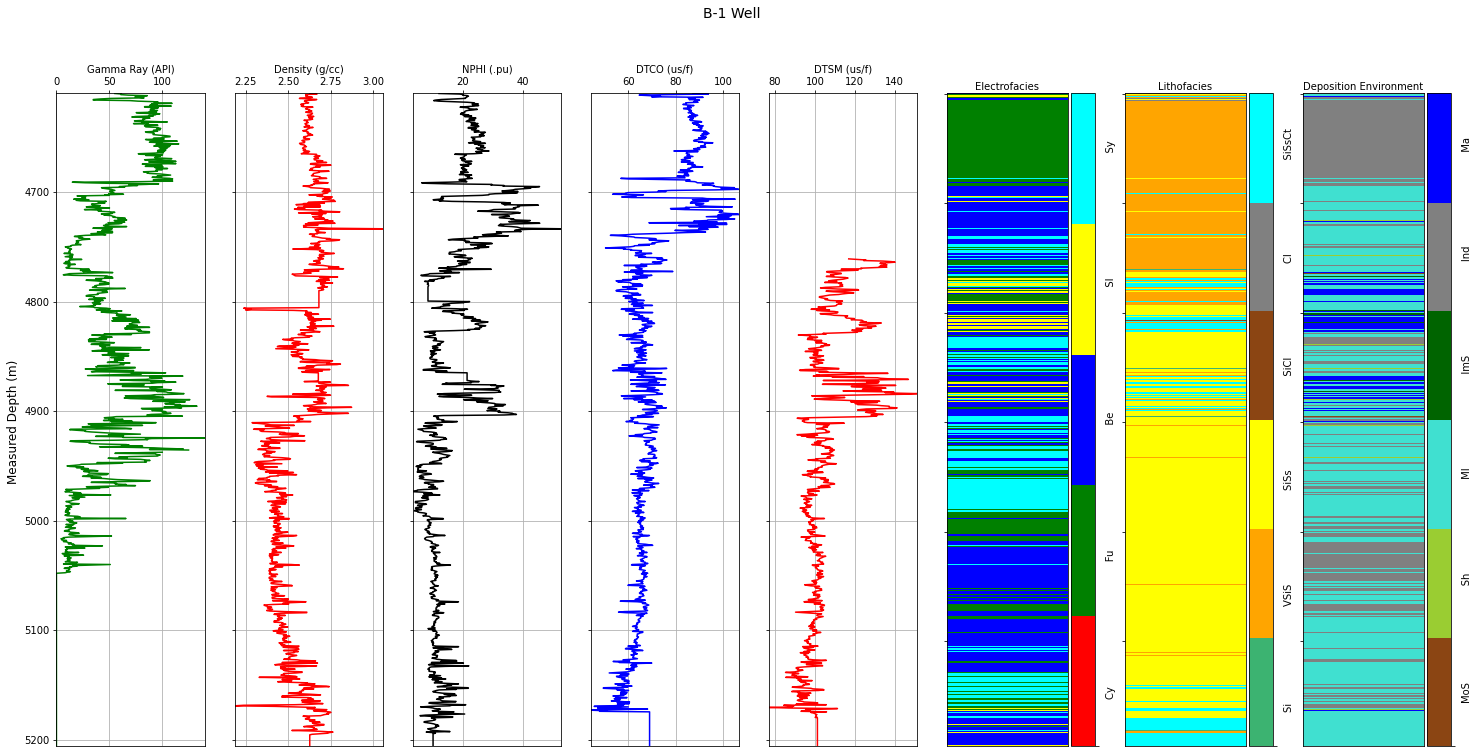

In [ ]:
plot_well(df, 'B-1')